# Create saved LabeledDataFrames for synthetic datasets

In [3]:
import mlsim
import wiggum as wg
import numpy as np
import string
from mlsim import sp_plot

np.random.seed(20210618)

## Cluster Shape parameters
The magnitude correlation coefficient of clusters controls the shape of the clusters. This is unlikely to be a parameter that we need to vary much for this particular study. This will matter when/if we filter by weak trends.


The pearson correlation of means controls the spread of the clusters. This will almost directly control filtering by weak aggregate trends, but in coordination with the above. 

Portion of clusters with SP  #1 if r neg 0 if rpos controls how many clusters exhibit reversal. Should not matter in the current studies. 

The cluster size dicates the overall spread of each cluster. 

domain_range controls the view in which the data are visible. 

In [2]:
r_clusters =     [-.8, .5, .4, .7, -.6, .5, .4,-.9]  # magnitude correlation coefficient of clusters
cluster_spread = [ .3,-.2, .1,-.4, .2, -.1, .2,.4] # pearson correlation of means
p_sp_clusters =  [  1,  0,  0,  0,  1,   0,  0,  1] # portion of clusters with SP  #1 if r neg 0 if rpos
cluster_size =   [2,  3]#
domain_range = [0, 20, 0, 20] # of all data

## Data size and complexity Parameters

The number of views is the number of independent views (of two variables each). The total number of continuous variables will be `n_views` *2.  

The number of group by variables will be equal to `n_views` and the number of levels of each is specified in the `k` list. 

In [3]:

k = [2]*8 + [4]*8 + [8]*8 + [16]*8 + [32]*8 # number of clusters
n_view = len(k)
N = 10000 # number of points total

The clusters can be variable in size or as close to equal as possible by toggling the following line

In [4]:
p_clusters = [[1/k_i]*k_i for k_i in k]

# p_clusters = [np.random.dirichlet([k_i*2]*k_i) for k_i in k]

## Sample the data and check the cluster sizes

In [5]:
many_sp_df = mlsim.geometric_indep_views_gmm_sp(n_view,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                domain_range,k,N,p_clusters)
# print largest and smallest cluster sizes
print([many_sp_df[c].value_counts().min() for c in list(string.ascii_uppercase[:n_view])])
print([many_sp_df[c].value_counts().max() for c in list(string.ascii_uppercase[:n_view])])

[4900, 4880, 4942, 4992, 4988, 4934, 4984, 4970, 2366, 2440, 2400, 2416, 2418, 2446, 2436, 2452, 1198, 1206, 1150, 1164, 1198, 1158, 1168, 1172, 584, 554]
[5100, 5120, 5058, 5008, 5012, 5066, 5016, 5030, 2588, 2552, 2574, 2546, 2602, 2540, 2550, 2550, 1300, 1346, 1382, 1298, 1302, 1320, 1382, 1310, 690, 666]


Plot all of the views to check that the data looks okay

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argumen

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.

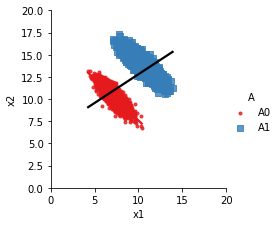

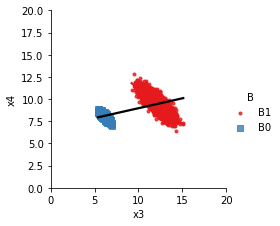

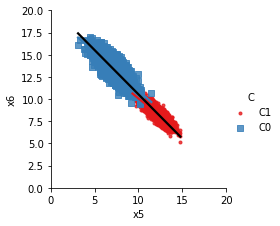

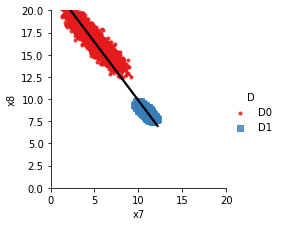

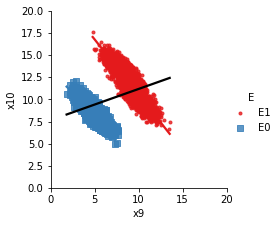

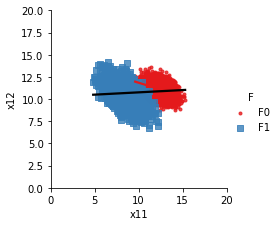

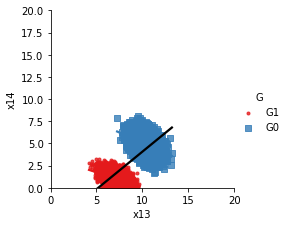

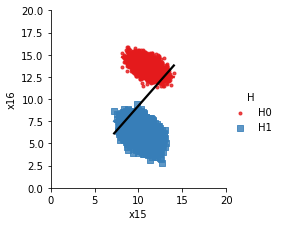

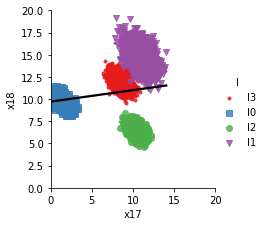

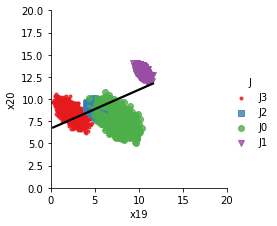

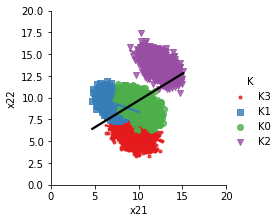

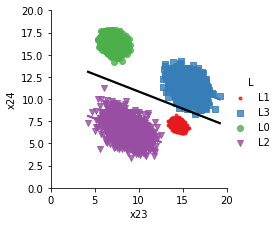

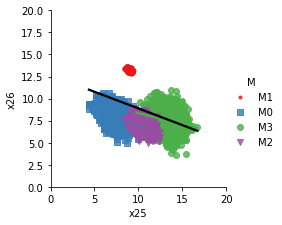

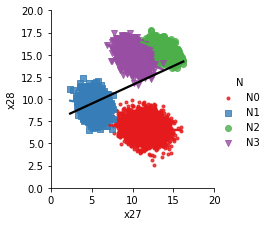

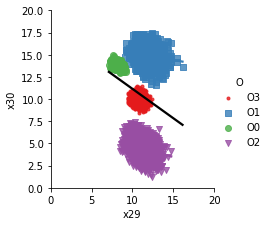

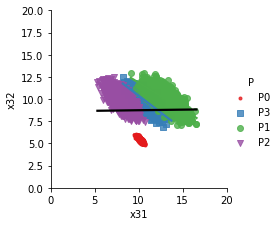

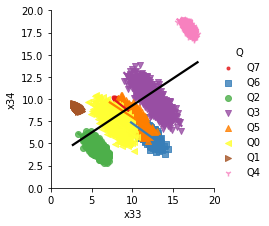

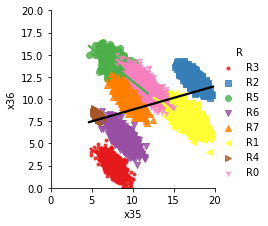

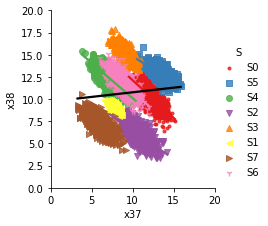

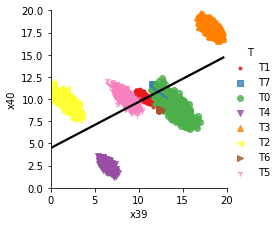

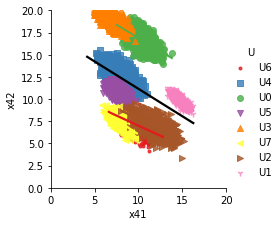

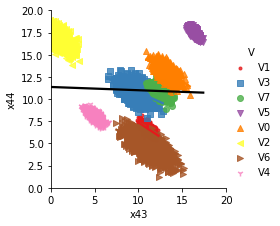

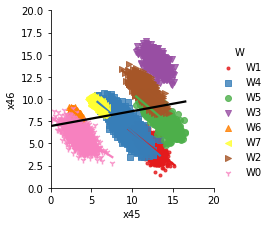

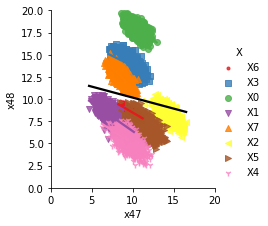

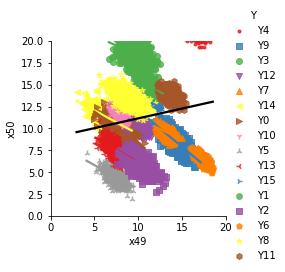

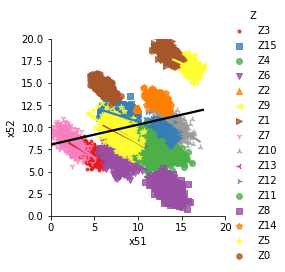

In [6]:
view_list = [('x'+str(i+1),'x'+str(i+2),c) for i,c in zip(range(0,n_view*2,2),list(string.ascii_uppercase[:n_view]))]

for view in view_list:
    sp_plot(many_sp_df,*view)
    
# sp_plot(many_sp_df,'x3','x4','B')

# many_sp_df.head()

Create the labeled dataframe ojbect

In [7]:
labeled_df = wg.LabeledDataFrame(many_sp_df)

Add meta data.  Here is where you could automate creating versions with different configurations of independent and depdendent variables and saving each one with a descriptive name, or keep what's there and modify elsewhere.

In [8]:
# all the xi are independent and dependent for now
roles = {'x'+str(i+1):['independent','dependent'] for i in range(n_view*2)}
# vars without 'x' in them are splitbys
splitby_var_list = [cn for cn in many_sp_df.columns if not('x' in cn)]
roles.update( {c:['splitby'] for c in splitby_var_list})
count_list = []

var_types = {'x'+str(i+1):'continuous' for i in range(n_view*2)}
var_types.update( {c:'categorical' for c in list(string.ascii_uppercase[:n_view])})
weighting = {}

# labeled_df.set_weighting_vars(weighting)


labeled_df.set_counts(count_list)
labeled_df.set_roles(roles)
labeled_df.set_var_types(var_types)
labeled_df.meta_df


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,dtype,var_type,role,isCount,weighting_var
variable,,,,,
x1,float64,continuous,"[independent, dependent]",False,NaN
x2,float64,continuous,"[independent, dependent]",False,NaN
x3,float64,continuous,"[independent, dependent]",False,NaN
x4,float64,continuous,"[independent, dependent]",False,NaN
x5,float64,continuous,"[independent, dependent]",False,NaN
...,...,...,...,...,...
JJ,object,NaN,[splitby],False,NaN
KK,object,NaN,[splitby],False,NaN
LL,object,NaN,[splitby],False,NaN


In [9]:
labeled_df.to_csvs('../data/synthetic_scalability_base')

True